In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

# Load the data into a Pandas DataFrame
data = pd.read_csv('tv_show_ratings.csv')


In [6]:

# Get all the overall average_ratings for each season
season_average_ratings = data.groupby('season')['average_rating'].mean().reset_index()
print("Overall average_ratings for each season:")
print(season_average_ratings)


Overall average_ratings for each season:
   season  average_rating
0       1          8.0900
1       2          8.0000
2       3          7.7750
3       4          7.5375


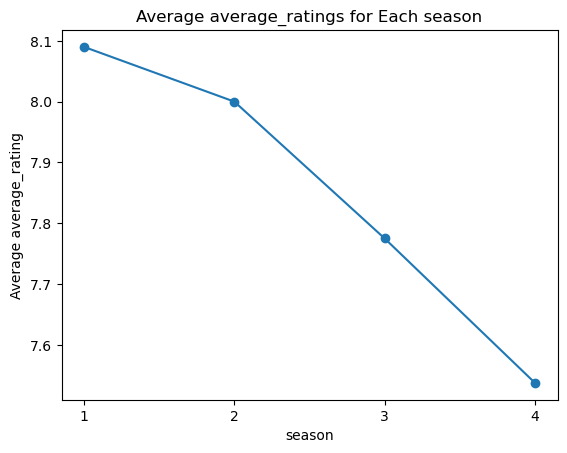

In [7]:

# Plot the average_ratings for all seasons
plt.plot(season_average_ratings['season'], season_average_ratings['average_rating'], marker='o')
plt.xlabel('season')
plt.ylabel('Average average_rating')
plt.title('Average average_ratings for Each season')
plt.xticks(season_average_ratings['season'])
plt.show()

In [8]:


# Get all the number names whose average average_rating is more than 8 for every season
high_average_rating_numbers = data.groupby(['season', 'number'])['average_rating'].mean().reset_index()
high_average_rating_numbers = high_average_rating_numbers[high_average_rating_numbers['average_rating'] > 8]
print("number names with average average_rating more than 8 for every season:")
print(high_average_rating_numbers['number'].unique())

number names with average average_rating more than 8 for every season:
[ 7  9 10  8]


In [9]:
# Get all the number names that aired before May 2019
data['airdate'] = pd.to_datetime(data['airdate'])
numbers_before_may_2019 = data[data['airdate'] < '2019-05-01']
print("number names that aired before May 2019:")
print(numbers_before_may_2019['number'].unique())

number names that aired before May 2019:
[ 1  2  3  4  5  6  7  8  9 10]


In [10]:
# Get the number name from each season with the highest and lowest average_rating
max_average_rating_numbers = data.groupby('season')['average_rating'].idxmax()
min_average_rating_numbers = data.groupby('season')['average_rating'].idxmin()
highest_rated_numbers = data.loc[max_average_rating_numbers, ['season', 'number', 'average_rating']]
lowest_rated_numbers = data.loc[min_average_rating_numbers, ['season', 'number', 'average_rating']]
print("number with the highest average_rating from each season:")
print(highest_rated_numbers)
print("number with the lowest average_rating from each season:")
print(lowest_rated_numbers)

number with the highest average_rating from each season:
    season  number  average_rating
9        1      10             8.7
17       2       8             8.7
20       3       1             8.0
32       4       5             7.8
number with the lowest average_rating from each season:
    season  number  average_rating
2        1       3             7.6
14       2       5             7.6
25       3       6             7.5
28       4       1             7.1


In [11]:
# Get the summary for the most popular (highest rated) number in every season
most_popular_numbers = data.groupby('season').apply(lambda x: x.loc[x['average_rating'].idxmax()])[['season', 'number', 'summary']]
print("summary for the most popular number in every season:")
print(most_popular_numbers)


summary for the most popular number in every season:
        season  number                                            summary
season                                                                   
1            1      10  Delores finds out the truth about William's fa...
2            2       8  Another of Westworld's Host revolutionaries is...
3            3       1  If you're stuck in a loop, try walking in a st...
4            4       5                                      God is bored.
